### Student Name: Aidan Keeshan
### Student ID: 18200117

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

#http://www.tarekatwan.com/index.php/2017/12/methods-for-testing-linear-separability-in-python/
#https://ieeexplore-ieee-org.proxy.lib.ul.ie/document/1603620

## Task 1 Import CSV

The first column of the source CSV has no title and is linear ascending integer from zero.    
I assume this was exported from pandas which exports the index unless specified otherwise.    
On import a new index was created and a field called 'Unnamed: 0' was in place or the original index.    
To remove redundancy I have set index_col=['Unnamed: 0'] as appeared in  df.columns.values.   
This may be unstable solution as undocumented, as far as I can see.   
It is not guaranteed the field name will be called that in all version of pandas.

In [2]:
df = pd.read_csv("bank_et1.csv",index_col=['Unnamed: 0'])
"|".join(df.columns.values)

'age|job|marital|education|default|balance|ratio_bal_ln|ratio_ln_inc|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|subscribed'

### Top 5 Records

In [3]:
df.head(5)

age          job   marital  education default  balance  ratio_bal_ln  \
0   32   technician    single   tertiary      no      392      1.300134   
1   39   technician  divorced  secondary      no      688     -0.193701   
2   59      retired   married  secondary      no     1035      1.334266   
3   47  blue-collar   married  secondary      no      398      0.362286   
4   54      retired   married  secondary      no     1004      0.072075   

   ratio_ln_inc housing loan   contact  day month  duration  campaign  pdays  \
0      0.473895     yes   no  cellular    1   apr       957         2    131   
1      0.237021     yes  yes  cellular    1   apr       233         2    133   
2      0.121981     yes  yes  cellular    1   apr       126         2    239   
3      1.251328     yes  yes  cellular    1   apr       274         1    238   
4     -0.533738     yes   no  cellular    1   apr       479         1    307   

   previous poutcome subscribed  
0         2  failure         no  
1         1  failure         no  
2         1  failure         no  
3         2  failure         no  
4         1  failure         no

### Bottom 5 Records

In [4]:
df.tail(5)

age           job  marital  education default  balance  ratio_bal_ln  \
1995   20       student   single        NaN      no     2785     -2.170524   
1996   28        admin.   single  secondary      no      127      0.811788   
1997   81       retired  married    primary      no     1154      0.504655   
1998   46      services  married    primary      no     4343     -0.965874   
1999   40  entrepreneur  married  secondary      no     6403     -0.800893   

      ratio_ln_inc housing loan    contact  day month  duration  campaign  \
1995      1.081071      no   no   cellular   16   sep       327         2   
1996      1.134496      no   no   cellular   16   sep      1334         2   
1997      0.042190      no   no  telephone   17   sep       231         1   
1998      0.302708     yes   no        NaN   20   sep       185         1   
1999      1.066659      no   no   cellular   22   sep       208         2   

      pdays  previous poutcome subscribed  
1995     -1         0      NaN        yes  
1996     -1         0      NaN        yes  
1997     -1         0      NaN        yes  
1998     -1         0      NaN        yes  
1999     -1         0      NaN        yes

## Task 2 EDA of the bank data set

### Summary Stats using pandas built-ins

For the numerical values we store summary to datafame so we can loop over later

In [ ]:
desc = df.describe()
desc

### Binary/Two Value Catergory

Isolate potential target variable for task 3/4. Plot the distributions for estimation of population spread

In [21]:
nunique = df.nunique()
nunique = pd.DataFrame({'VARNAME' : nunique.index.values, 'VARNDIS': nunique.reset_index(drop=True)}).sort_values(by=['VARNDIS'])
two_catg_var = nunique[nunique['VARNDIS']==2]
two_catg_var

VARNAME  VARNDIS
9         loan        2
10     contact        2
8      housing        2
4      default        2
18  subscribed        2

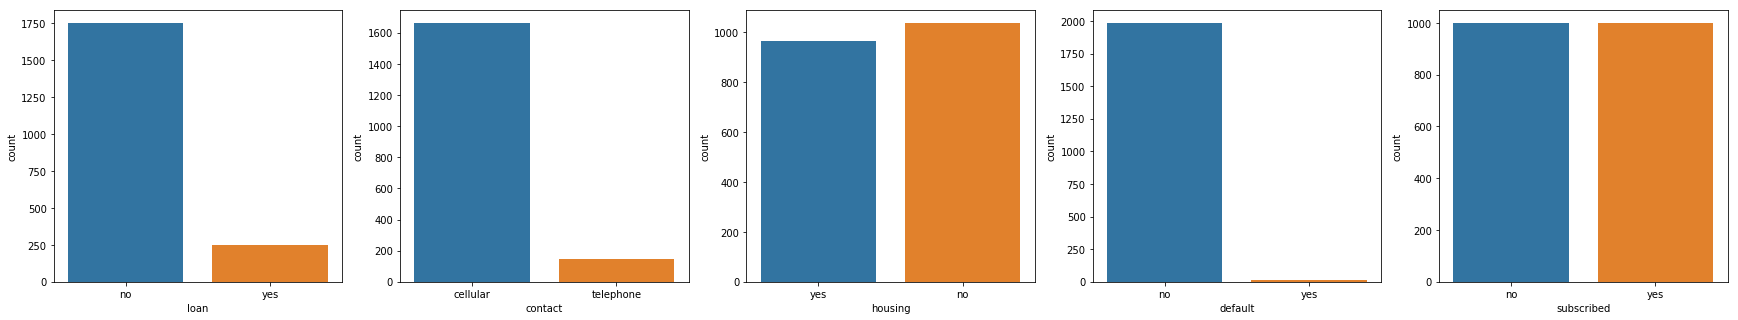

In [22]:
fig, axs = plt.subplots(ncols=5,figsize=(30,5))
sns.countplot(x='loan', data=df, ax=axs[0])
sns.countplot(x='contact', data=df, ax=axs[1])
sns.countplot(x='housing', data=df, ax=axs[2])
sns.countplot(x='default', data=df, ax=axs[3])
sns.countplot(x='subscribed', data=df, ax=axs[4])
plt.show()

In [24]:
df.describe(include=np.object)

job  marital  education default housing  loan   contact month  \
count         1990     2000       1896    2000    2000  2000      1809  2000   
unique          11        3          3       2       2     2         2    12   
top     management  married  secondary      no      no    no  cellular   feb   
freq           461     1111        995    1985    1037  1750      1663   404   

       poutcome subscribed  
count      1546       2000  
unique        3          2  
top     failure         no  
freq        955       1000

### Categorical 

Excluding the binary categories and month (as ordinal) job , martial, education look most interesting.

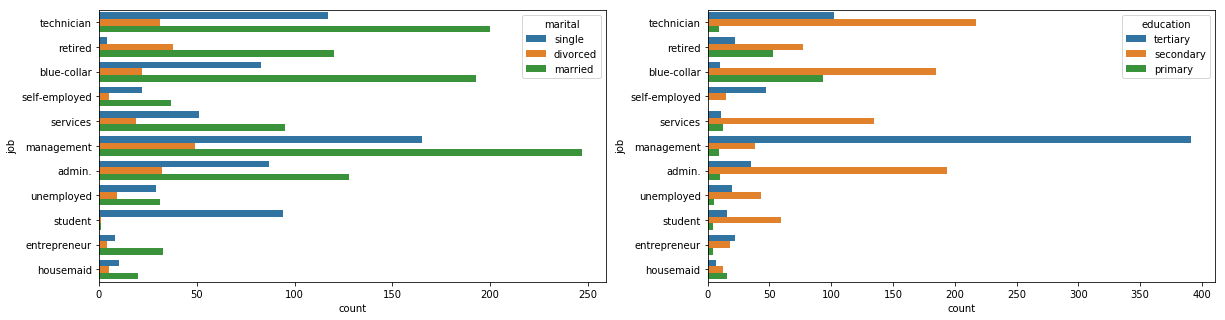

In [16]:
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(y="job", hue="education", data=df, ax=axs[1])
sns.countplot(y="job", hue="marital", data=df, ax=axs[0])
plt.show()

Plotting job type against level of education shows technician and management as most prevalent in the data set.   Additional shows correlation with secondary and tertiary respectively for these types.
Hard to judge on the unscaled image if divorces levels are higher in management. If so hypothesie would be potential proxy age indication ie older people in management and higher probability of divorce.


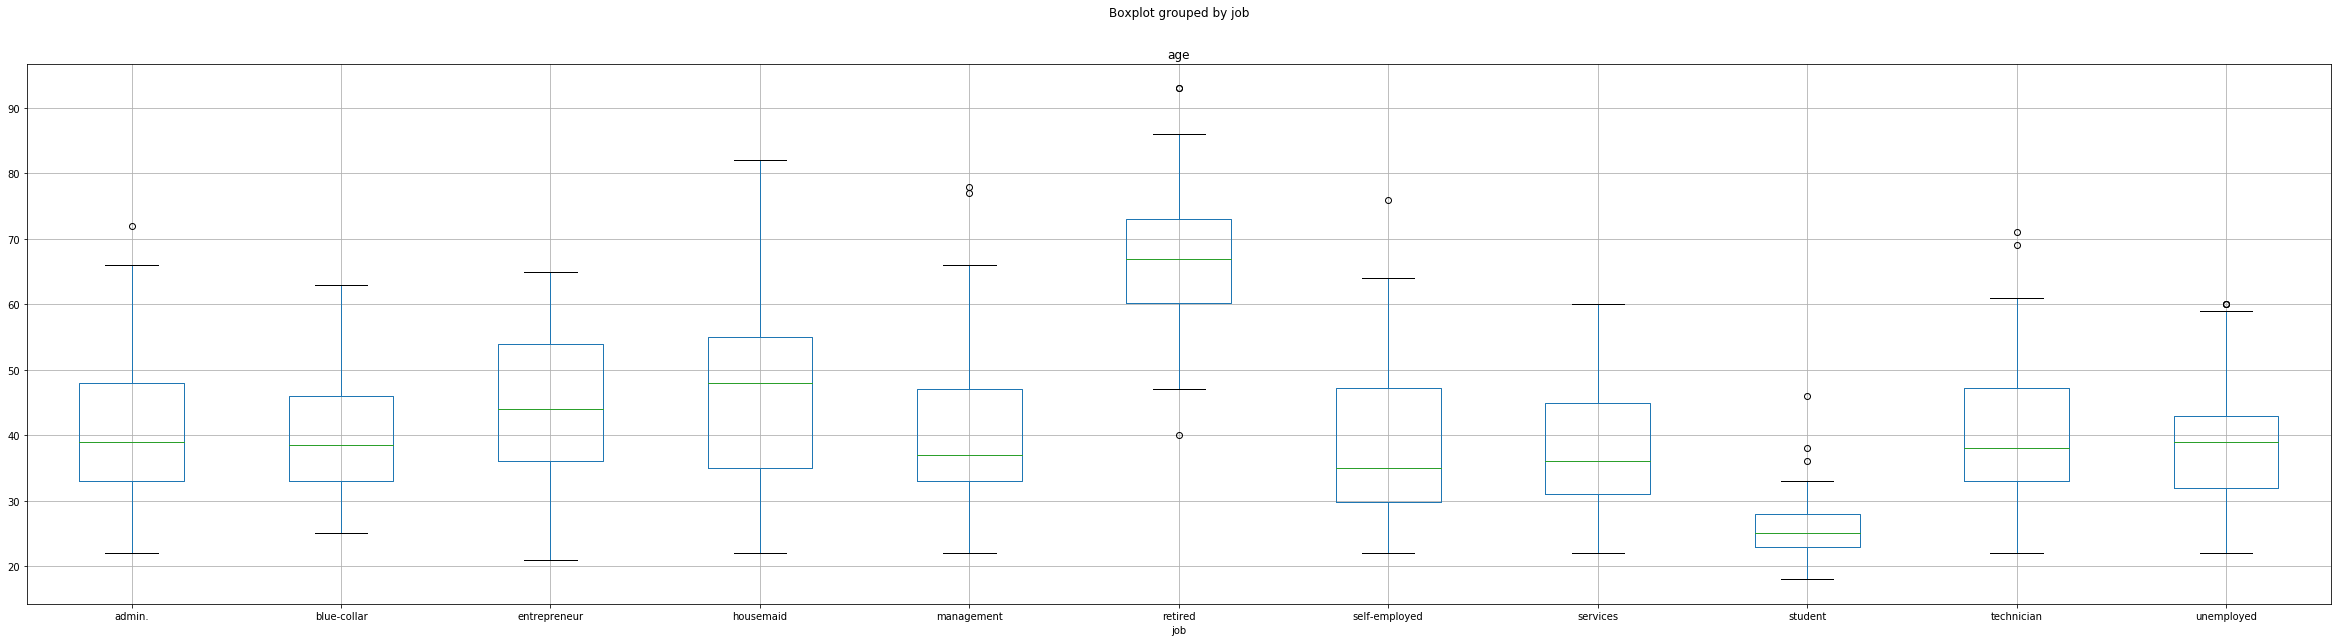

In [25]:
fig, ax = plt.subplots(figsize=(40,10))
plt.suptitle('')
df.boxplot(column=['age'], by='job', ax=ax)
plt.show()

The age across technician and management look very similar. There are outliers in both at what would be expected to be retirement age. Interesting to see similar outliers in Student and Retired
Indicating exceptional cases which may be data entry error or for example some one who retires at 40 are goes back to college at 50.


### Numerical Values versus Two Value categories

We have stored 9 numerical values in desc from pandas summary above.  
We don not want to repeat then number of plots and we need to know ahead of time how   
many there are. We can have 9 chose 2 using comb from scipy

<sub>9</sub>C<sub>2</sub> = 36

As per the video lecture we assume the Y=Green and N=Red. 
We can test to ensure that all values are populated. We have already checked to know all except contact are Y/N 

In [77]:
from scipy.special import comb
num_cols = desc.columns.values
ln_num = (len(num_cols))
ncr = comb(ln_num,2)

width = 6
hieght = int(np.ceil(ncr/width))


def plot_scatter(bin_var):
    if df[bin_var].value_counts().sum() != df[bin_var].size:
        print ("Error only {} of {} populated.".format(df[bin_var].value_counts().sum(),df[bin_var].size))
        return None
    colors = df[bin_var].map(dict(yes='green', no='red'))
    f = plt.figure(figsize=(40,25))
    k = 1
    for i in range(len(num_cols)):
        for j in range(len(num_cols)):
            if i<j:
                ax = f.add_subplot(hieght,width,k)
                ax.scatter(df[num_cols[i]],df[num_cols[j]],  color=colors)
                ax.set_title("{}: {} vs {}".format(bin_var,num_cols[i],num_cols[j]))
                k += 1
    f.show()

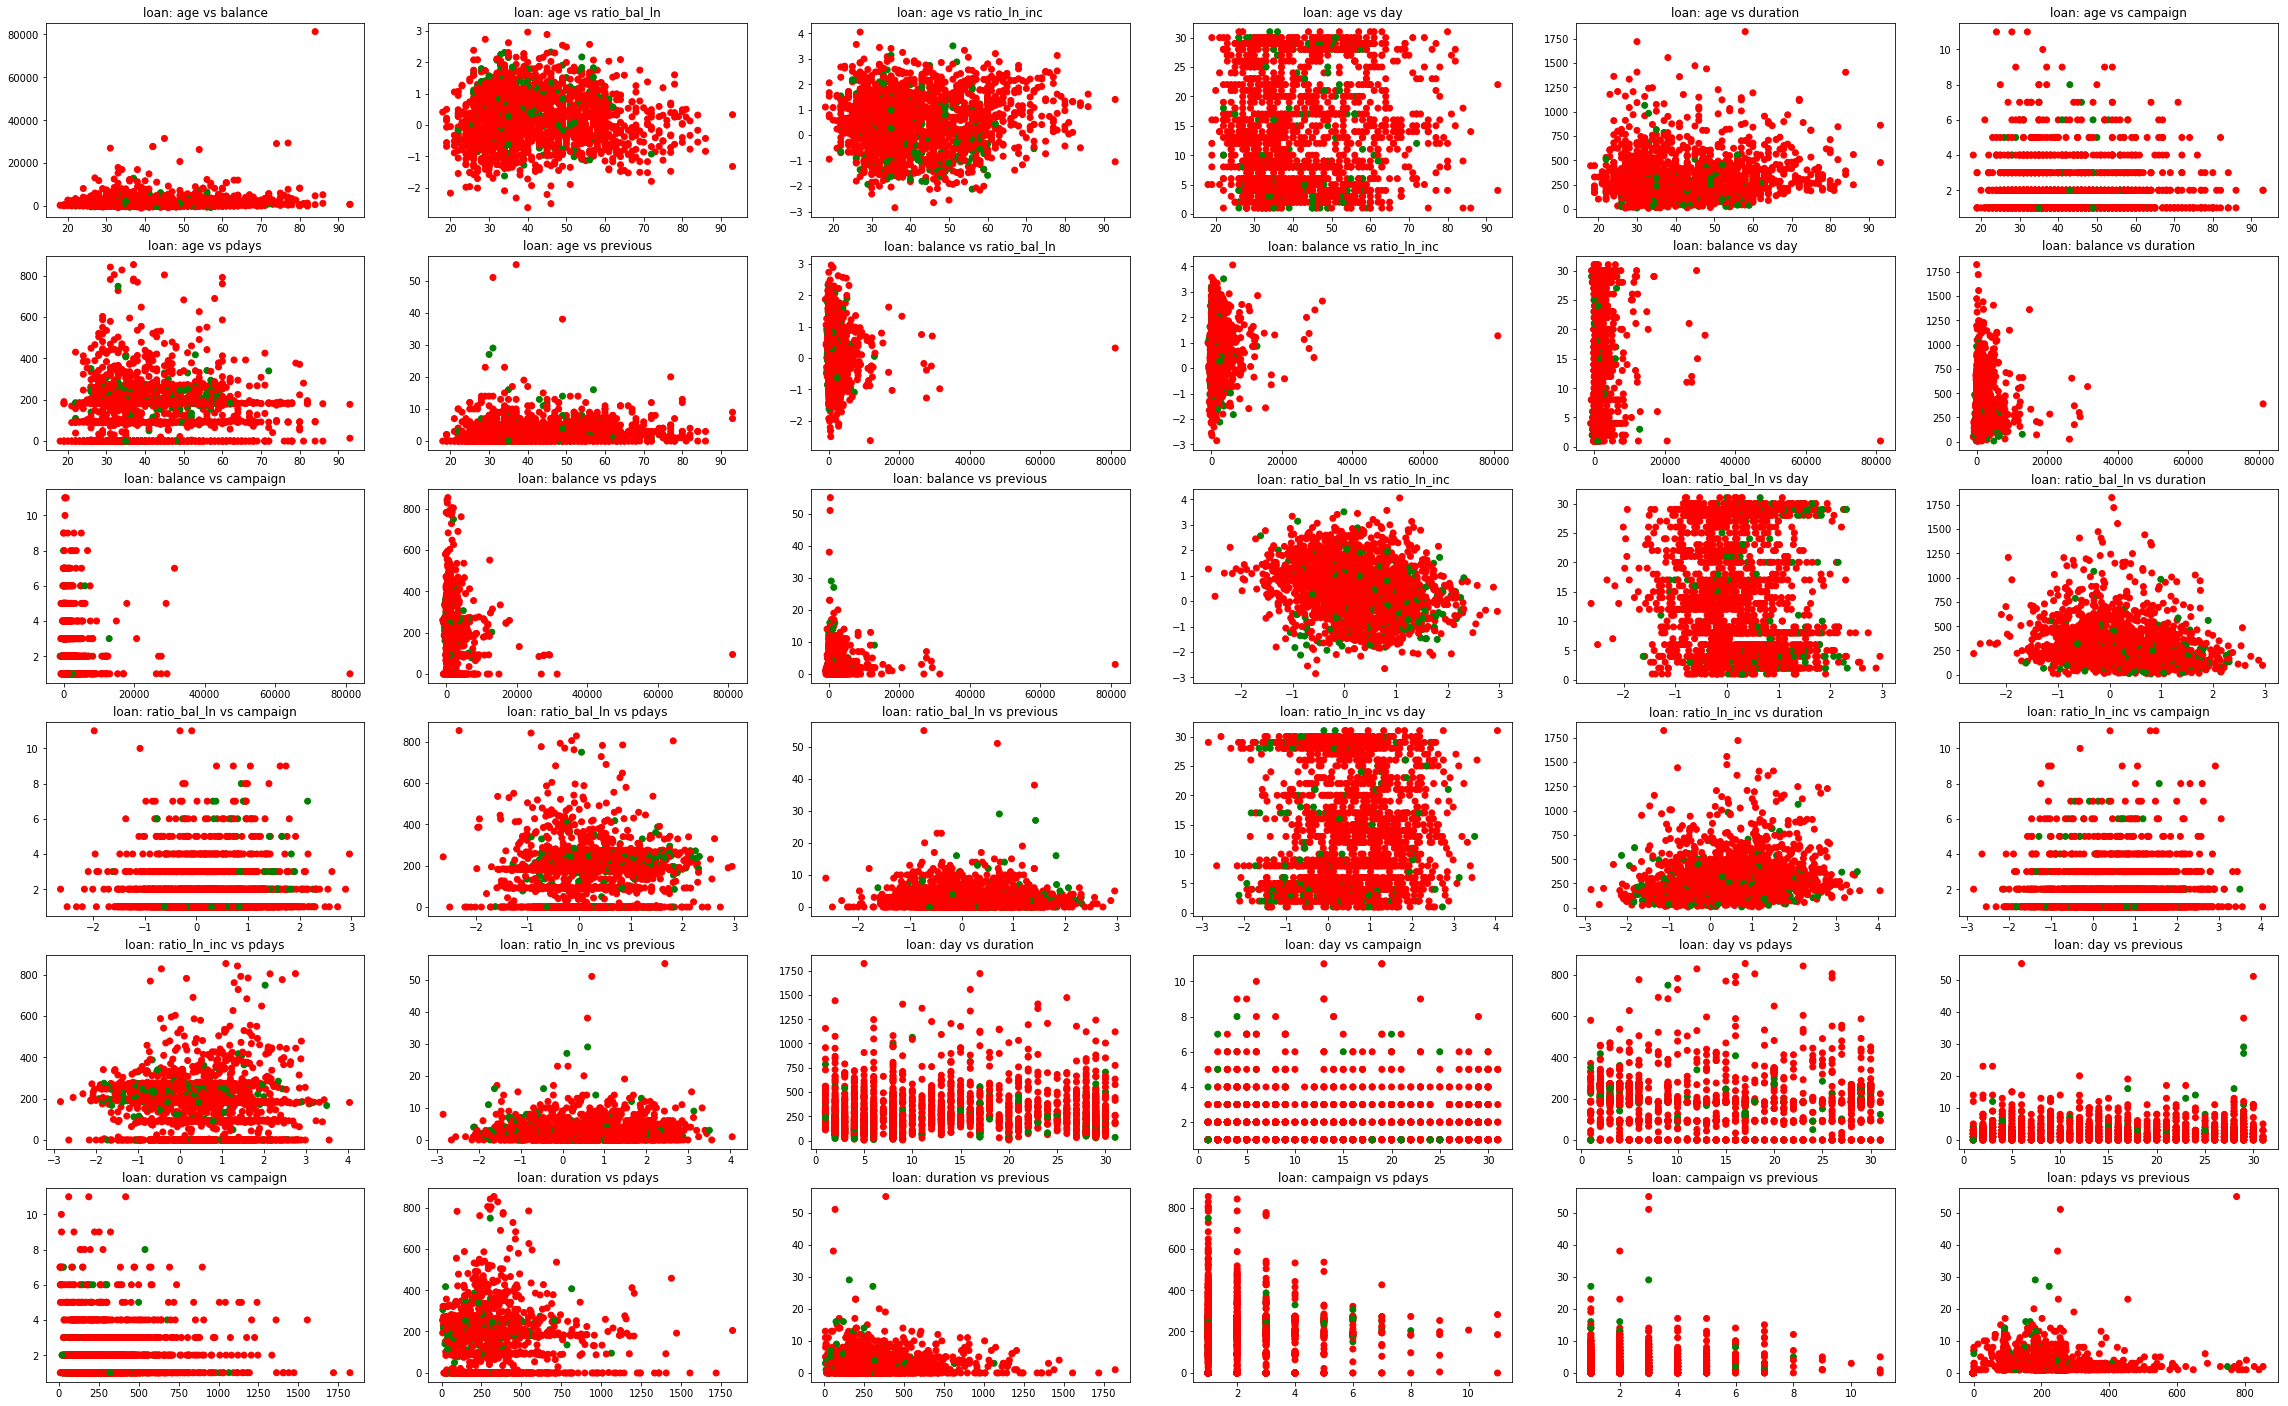

In [78]:
plot_scatter('loan')

In [79]:
plot_scatter('contact')

Error only 1809 of 2000 populated.


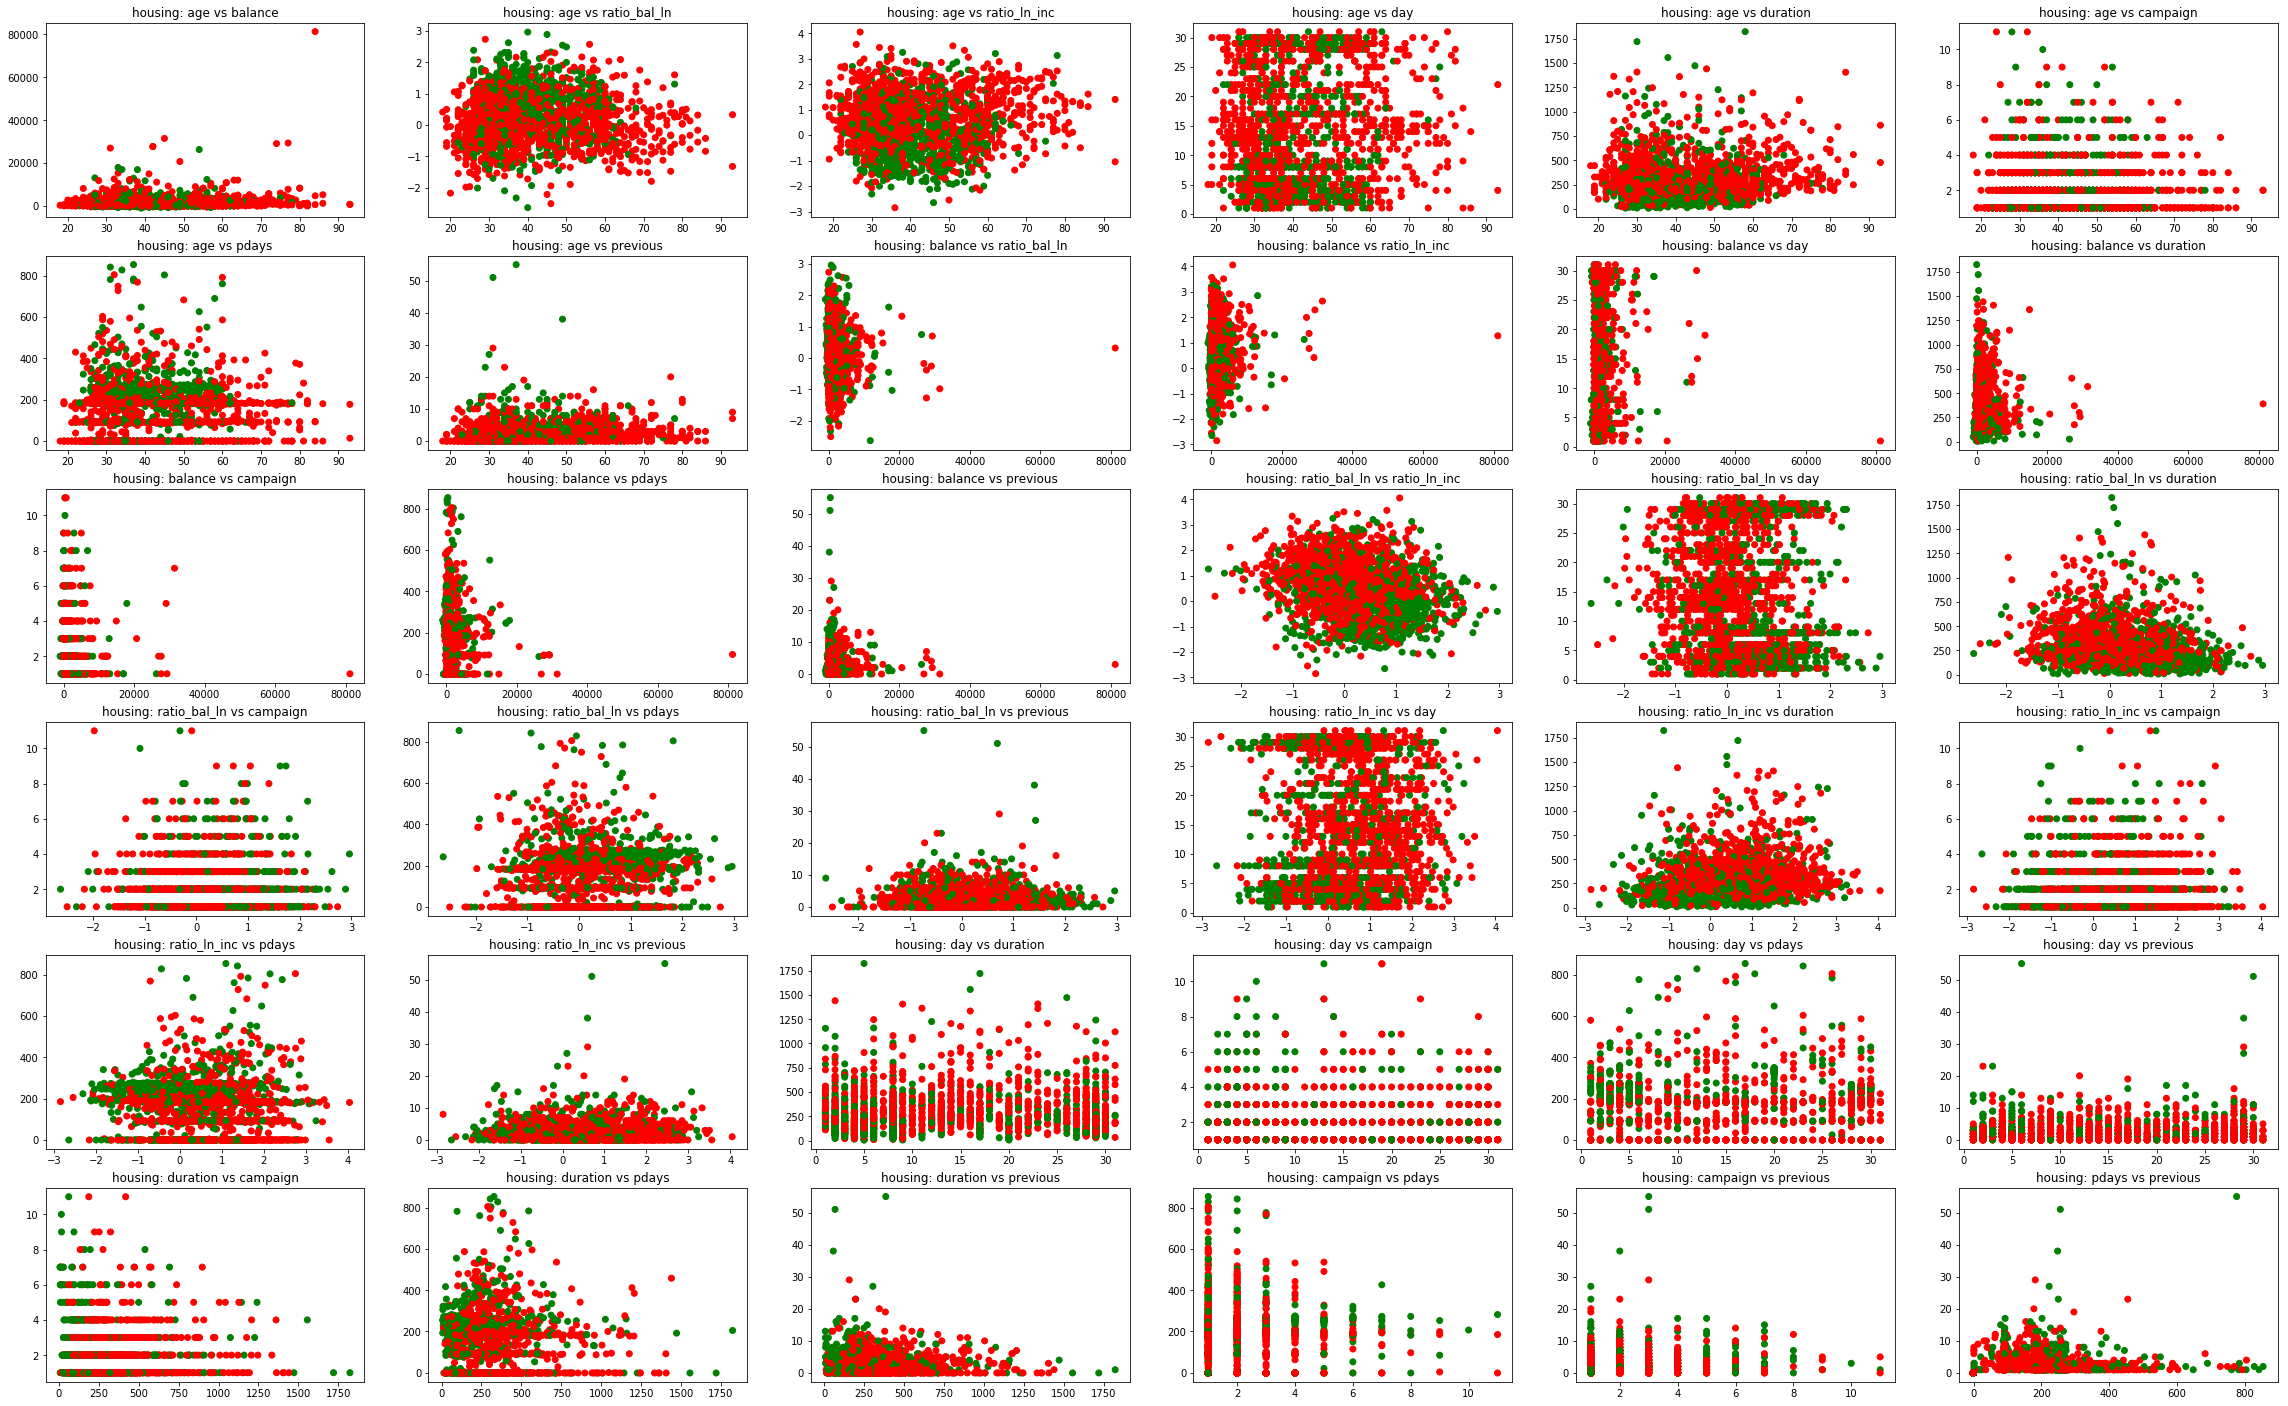

In [80]:
plot_scatter('housing')

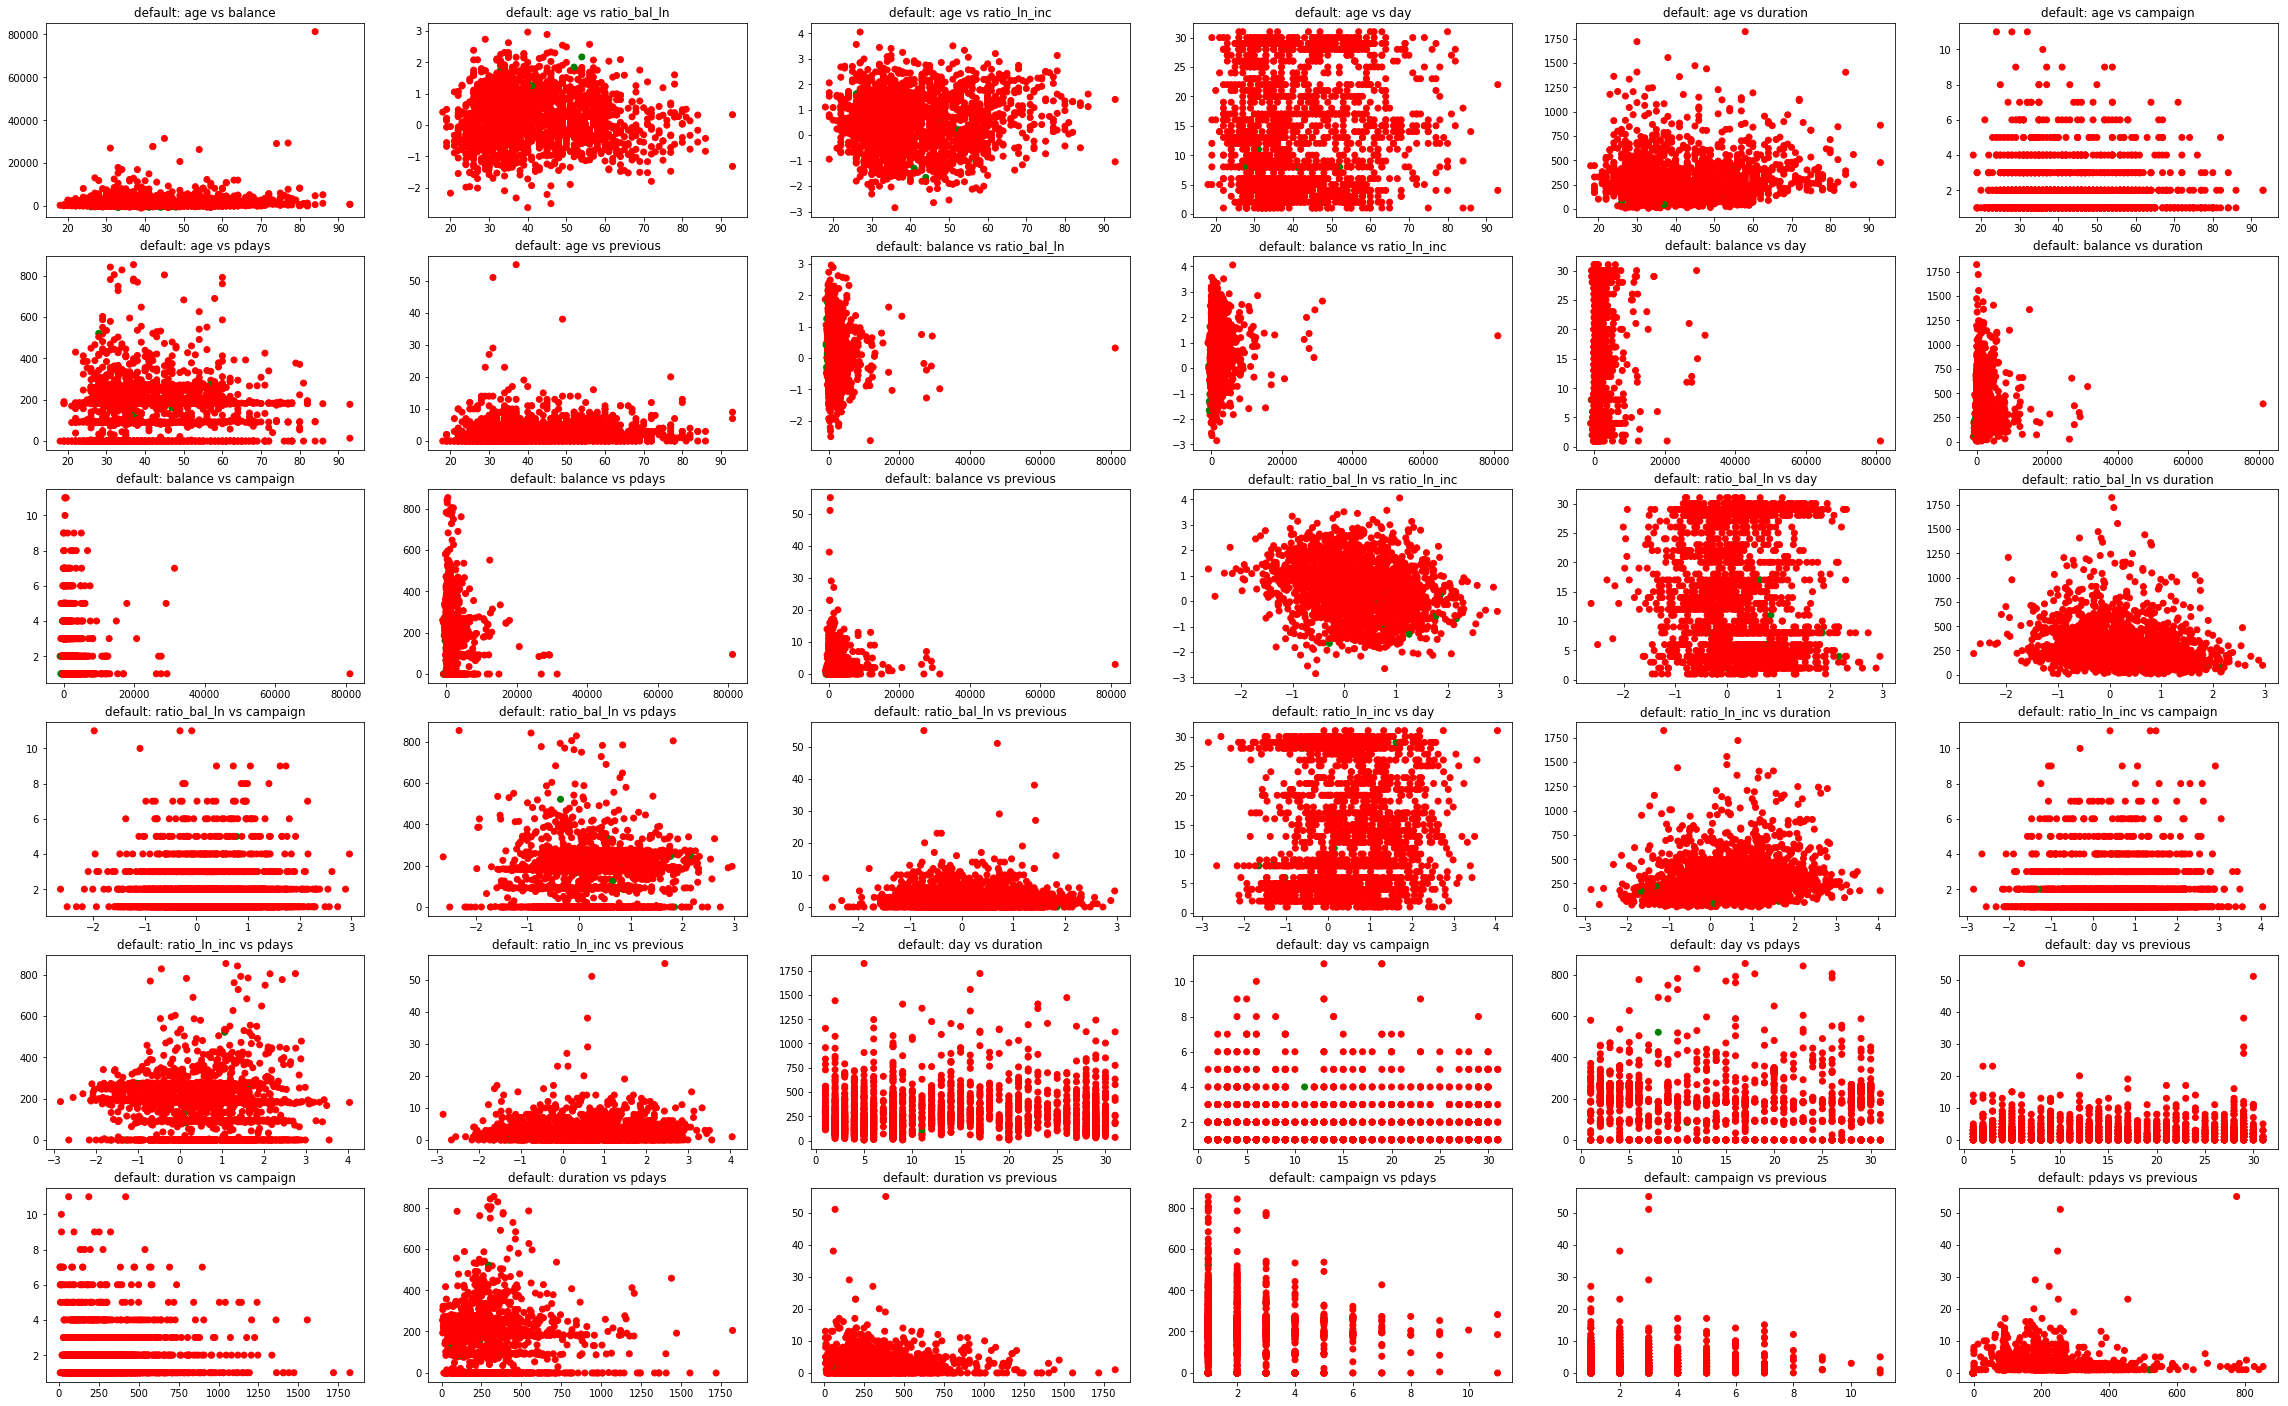

In [81]:
plot_scatter('default')

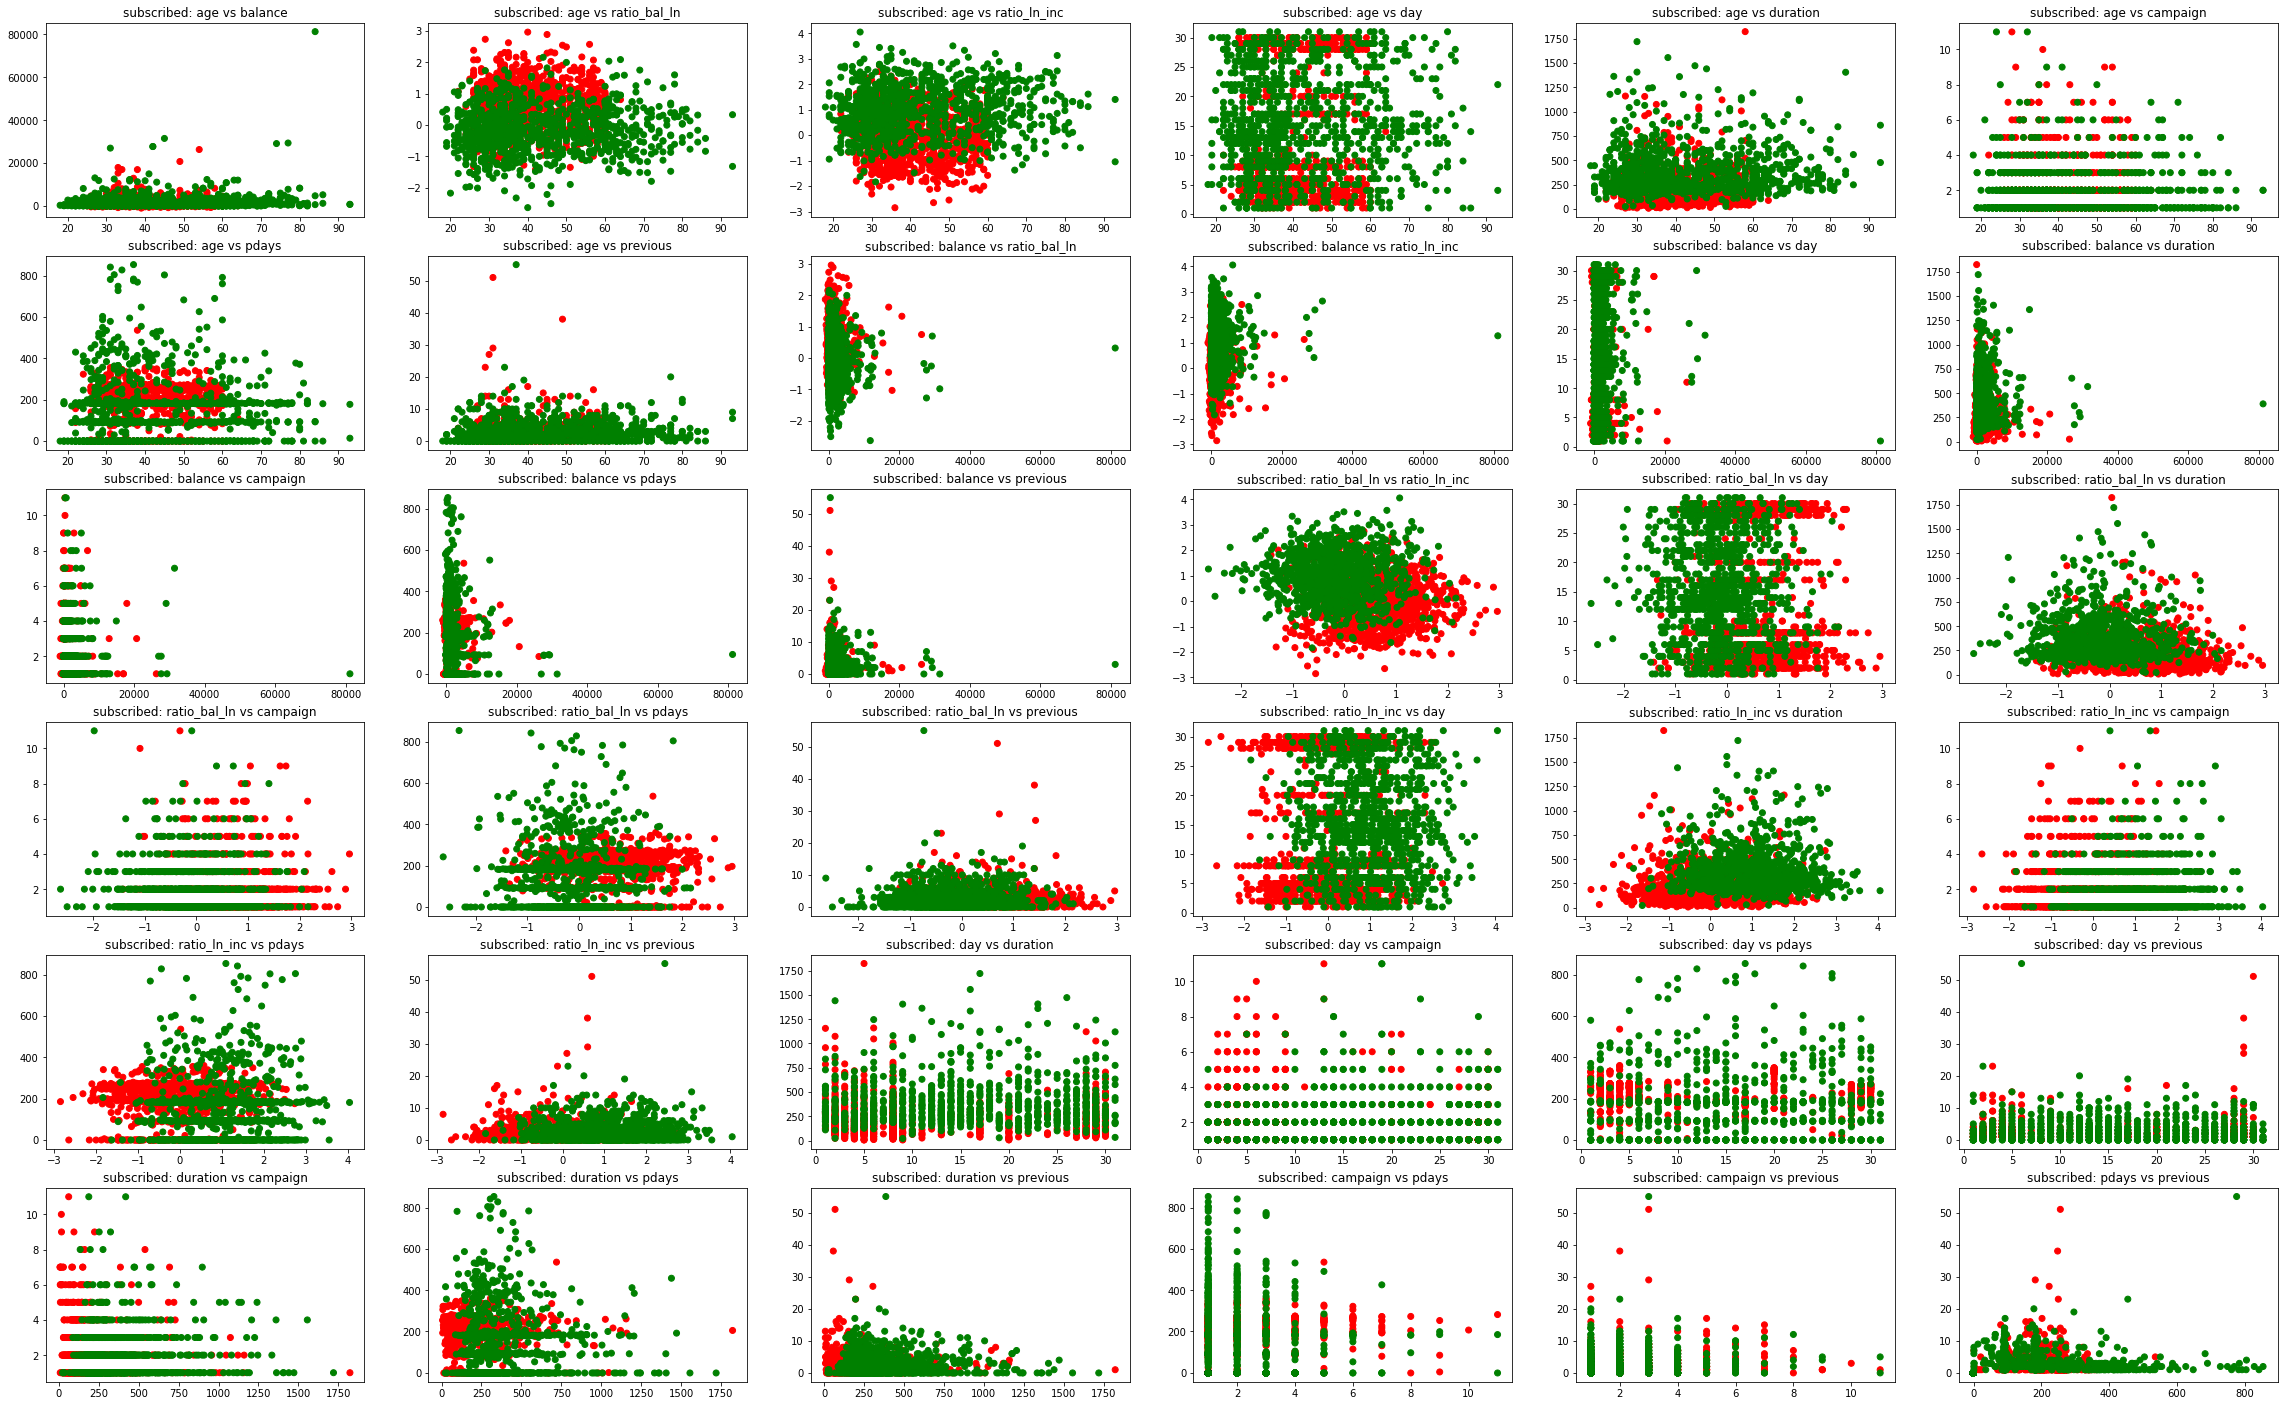

In [82]:
plot_scatter('subscribed')

### Conclusion 
For the purpose of identifying linearly separable combination hosing and subscribe seem to be the best from the plots.   
Further I have chosen **ratio_bal_ln and ratio_ln_inc** as the most when compared against subscribed


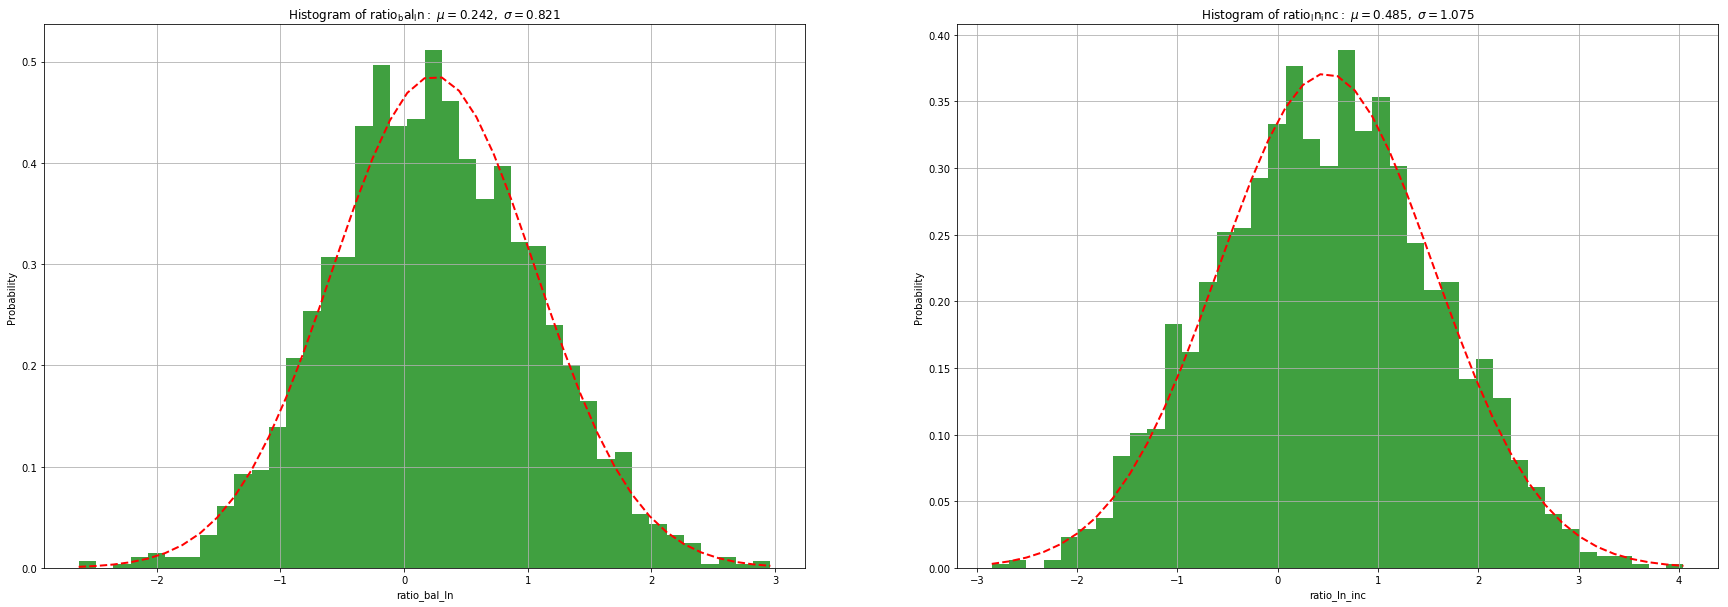

In [33]:
from scipy.stats import norm
import matplotlib.mlab as mlab

def plot_norm(ax,column):
    data = df[column]
    (mu, sigma) = norm.fit(data)
    n, bins, patches = ax.hist(data, 40, normed=1, facecolor='green', alpha=0.75)
    y = mlab.normpdf( bins, mu, sigma)
    l = plt.plot(bins, y, 'r--', linewidth=2)
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.title(r'$\mathrm{Histogram\ of\ '+column+':}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
    ax.grid(True)

f = plt.figure(figsize=(30,10))
ax = f.add_subplot(1,2,1)
plot_norm(ax,'ratio_bal_ln')
ax = f.add_subplot(1,2,2)
plot_norm(ax,'ratio_ln_inc')
f.show()

### Balance / Loan 
Assume that the spread of balance can be +/- giving us the spread across the origin. The distibtuion looks to normal with median just above zero.
### Loan / Income
Assuming that inc is income it is strange as you would assume income can only be positive thus would be no negative/positive values.  Shows very similar distribution as above slight wider standard deviations.


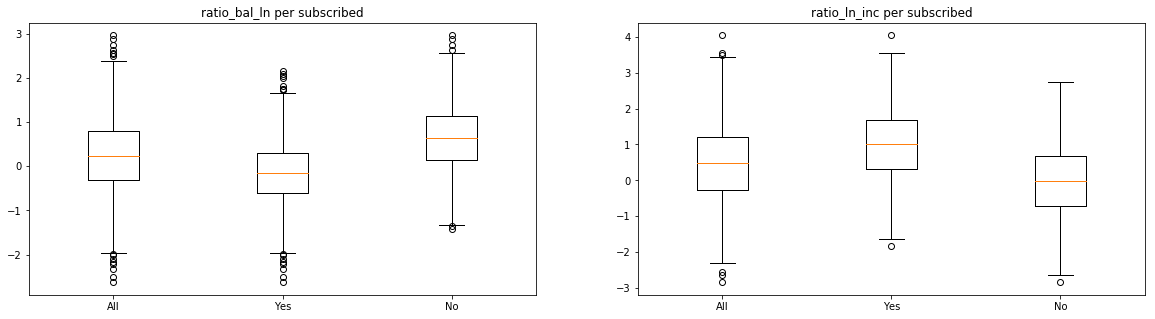

In [85]:
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(1,2,1)
ax.boxplot([df['ratio_bal_ln'],df['ratio_bal_ln'][df['subscribed'] == 'yes'],df['ratio_bal_ln'][df['subscribed'] == 'no']],labels=['All','Yes','No'])
ax.set_title("ratio_bal_ln per subscribed")
ax = f.add_subplot(1,2,2)
ax.boxplot([df['ratio_ln_inc'],df['ratio_ln_inc'][df['subscribed'] == 'yes'],df['ratio_ln_inc'][df['subscribed'] == 'no']],labels=['All','Yes','No'])
ax.set_title("ratio_ln_inc per subscribed")
f.show()

This shows that we expect those who have negative ratio_bal_ln to subscribe 

Where as opposite is true for ratio_ln_inc

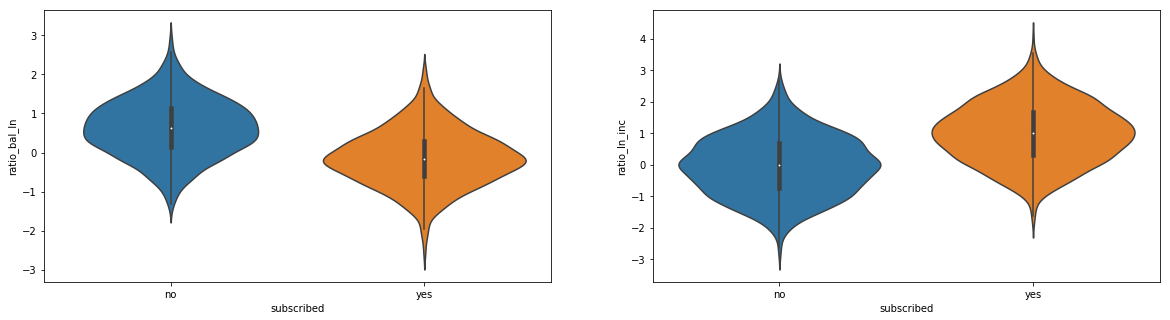

In [87]:
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
sns.violinplot(x='subscribed', y='ratio_bal_ln',data=df, ax=axs[0])
sns.violinplot(x='subscribed', y='ratio_ln_inc',data=df, ax=axs[1])
plt.show()

Violent plot show similar trend as above

## SVM Conformation 

I have taken the housing and subscribed and 36 variable pair-plots and used Support Vector Machine to find clusters.    
As some of the combination are not inseparable at all the SVM method was reaching max iterations.    
As this is only for analysis/guidance I have limited to max 2500 iterations in all instances.   
It can be seen that the SVM sorted by score confirms visual inspection from above. 

In [113]:
from sklearn.svm import SVC 
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


svms = pd.DataFrame(columns=['catg_var','x_col','y_col','score'])
for catg in ['housing','subscribed']:  
    y_test = df[catg].map(dict(yes=1, no=-1))
    for i in range(len(num_cols)):
            for j in range(len(num_cols)):
                if i<j:
                    clf = SVC(kernel='linear',max_iter=2500)  
                    clf.fit(df[[num_cols[i],num_cols[j]]], y_test)
                    score = clf.score(df[[num_cols[i],num_cols[j]]], y_test)
                    svms= svms.append({'catg_var':catg,'x_col': num_cols[i], 'y_col': num_cols[j], 'score':score}, ignore_index=True)
svms['error'] = 1 - svms['score']
svms.sort_values(by=['score'], ascending=False).head(10)

catg_var         x_col         y_col   score   error
51  subscribed  ratio_bal_ln  ratio_ln_inc  0.7815  0.2185
56  subscribed  ratio_bal_ln      previous  0.7090  0.2910
54  subscribed  ratio_bal_ln      campaign  0.7070  0.2930
59  subscribed  ratio_ln_inc      campaign  0.6980  0.3020
61  subscribed  ratio_ln_inc      previous  0.6910  0.3090
38  subscribed           age  ratio_ln_inc  0.6895  0.3105
15     housing  ratio_bal_ln  ratio_ln_inc  0.6540  0.3460
55  subscribed  ratio_bal_ln         pdays  0.6540  0.3460
6      housing           age         pdays  0.6495  0.3505
65  subscribed           day      previous  0.6455  0.3545

## Task 3

In [42]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=42)
y = [yy if yy == 1 else -1 for yy in y] 

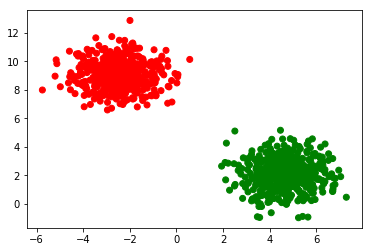

In [43]:
colors = ['green' if yy == 1 else 'red' for yy in y] 
plt.scatter(X[:,0],X[:,1], color=colors)
plt.show()

In [44]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [45]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [46]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights,x_min), point_on_boundary(weights,x_max)]

In [47]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            break
    return weights, iterations

In [48]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors

#https://stackoverflow.com/questions/15616742/vectorized-way-of-calculating-row-wise-dot-product-two-matrices-with-scipy

from numpy.core.umath_tests import inner1d

def calc_error_np(training_in, training_out, weights):
    training_in = np.column_stack((np.ones(training_in.shape[0]),training_in))
    out = np.sign(inner1d(weights.T,training_in))
    return ((out != training_out).sum())

In [49]:
def run_pla(w):
    (w,iter_n) = pla(X,y,w)
    xs = [np.min(X[:,0]),np.max(X[:,0])] 
    ys = decision_boundary(w,xs[0],xs[1])
    colors = ['green' if yy == 1 else 'red' for yy in y] 
    plt.scatter(X[:,0],X[:,1], color=colors)
    plt.plot(xs,ys, 'b-')
    plt.title("Interation: {:.0f} : Bias = {}, w1 = {:.2f}, w2 = {:.2f}".format(iter_n,w[0],w[1],w[2]))
    plt.show()

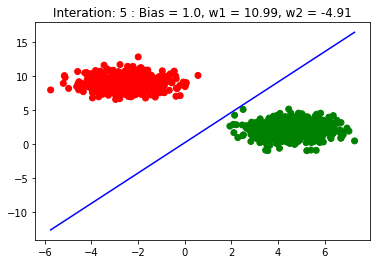

In [50]:
run_pla(np.array([0,-4,4]))

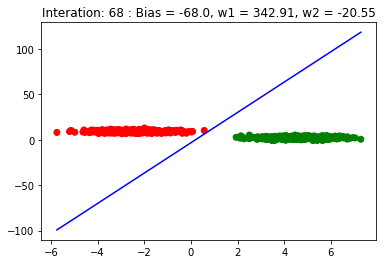

In [51]:
run_pla(np.array([0,200,600]))

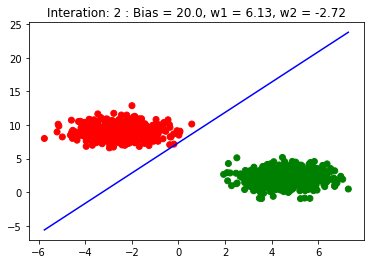

In [52]:
run_pla(np.array([20,0.000001,0.00000001]))

In [53]:
def pla_pocket_new(training_in, training_out, weights):
    
    bias = np.array([1])
    indexs = np.arange(training_in.shape[0])
    np.random.shuffle(indexs)
    
    test_per = 0.2
    ind_split = np.int((1-test_per)*indexs.shape[0])
    ind_test = indexs[ind_split:]
    ind_train = indexs[:ind_split]
    
    num_iter = 1
    summary = np.zeros((ind_train.shape[0]*num_iter+1,2))
    
    ein = calc_error_np(training_in[ind_train], training_out[ind_train], weights)
    eout = calc_error_np(training_in[ind_test], training_out[ind_test], weights)
    summary[0] = [ein,eout]  
    k = 1
    for n in range(num_iter):
        np.random.shuffle(ind_train)
        for i in zip(ind_train):
            x = training_in[i]
            y = training_out[i]  
            if (h(x,weights)!=y):
                new_weights = weights + y*(np.concatenate((bias,x)))
                new_ein = calc_error_np(training_in[ind_train], training_out[ind_train], new_weights)
                if new_ein < ein:
                    ein = new_ein
                    weights = new_weights
                    eout = calc_error_np(training_in[ind_test], training_out[ind_test], weights)
            summary[k] = [ein,eout]
            k += 1
    summary[:,0] = summary[:,0]/ind_train.shape[0]
    summary[:,1] = summary[:,1]/ind_test.shape[0]
    return summary,weights


def pla_pocket(training_in, training_out, weights):
    bias = np.array([1])
    summary = np.zeros((training_out.shape[0],weights.shape[0]+1))
    i = 0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            weights = weights + y*(np.concatenate((bias,x)))
        summary[i][0] = calc_error_np(training_in, training_out, weights)
        for j in range(weights.shape[0]):
            summary[i][j+1] = weights[j]
        i += 1    
    return summary

#df = df.sample(frac=1)

w = np.array([random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)])
pla_in = df[['ratio_bal_ln', 'ratio_ln_inc']].values
pla_out = df['subscribed'].map(dict(yes=1, no=-1)).values
summary,w = pla_pocket_new(pla_in,pla_out,w)



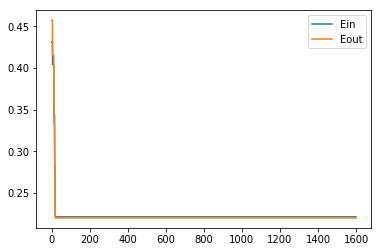

In [63]:
plt.plot(np.arange(summary.shape[0]), summary[:,0],summary[:,1])
plt.legend(['Ein','Eout'])
plt.show()

In [55]:
#plt.plot(np.arange(summary.shape[0]), summary[:,2], summary[:,3])
#plt.show()

In [64]:
#ind_min = np.argmin(summary[:,0], axis=0)
#w = summary[ind_min][1:4]
print ("Ein: {:.2%} Eout: {:.2%} : Bias = {}, w1 = {:.2f}, w2 = {:.2f}".format(summary[-1,0],summary[-1,1],w[0],w[1],w[2]))

Ein: 22.12% Eout: 22.00% : Bias = 0.787697209935318, w1 = 0.18, w2 = 0.40


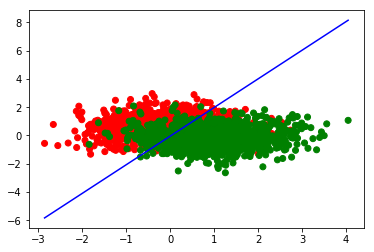

In [57]:
colors = df['subscribed'].map(dict(yes='green', no='red'))
xs = [df['ratio_ln_inc'].values.min(),df['ratio_ln_inc'].values.max()] # Based on feedback from Martin
ys = decision_boundary(w,xs[0],xs[1])
plt.scatter(df['ratio_ln_inc'],df['ratio_bal_ln'],  color=colors)
plt.plot(xs,ys, 'b-')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

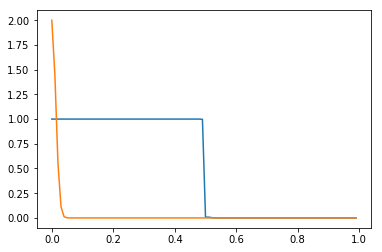

In [68]:
N = 1600
epsilons = np.arange(0, 1, 0.01)
dist = summary[:,0]-summary[:,1]
prob_epsilon = []

for e in epsilons:
        prob_epsilon.append(len([1 for i in dist if abs(i-0.5) > e])/len(dist))

plt.figure()
plt.plot(epsilons, prob_epsilon)
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons])
#plt.title(titles[d])
plt.show

In [58]:
import timeit
import random


# Randomise the order of the dataframe and assing columns to numpy arrays
df_rnd = df.sample(frac=1)
X_in = df_rnd[['ratio_bal_ln', 'ratio_ln_inc']].values
y_in = df_rnd['subscribed'].map(dict(yes=1, no=-1)).values


# Create 2000 weights at random to test performance over 2000 interations
ws = []
num_it = 2000
for i in range(num_it):
    ws.append(np.array([random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)]))
# w = np.array([0.,2,1.44254312])

ret = np.zeros((num_it,2))

start = timeit.default_timer()
i = 0
for w in ws:
    ret[i,0] = calc_error_np(X_in,y_in,w)
    i += 1
time_np = timeit.default_timer() -start

print ("Runtime Numpy:\t\t{:.4f}".format((time_np)))

start = timeit.default_timer()
i = 0
for w in ws:
    ret[i,1]  = calc_error(X_in,y_in,w)
    time_orig = timeit.default_timer() -start
    i += 1
print ("Runtime Orig:\t\t{:.4f}".format((time_orig)))

print ("Speed up via Numpy:\t{:.2f}X\n".format(time_orig/time_np))
print ("Comparison of Reults:\n",ret)

Runtime Numpy:		0.0683
Runtime Orig:		20.3842
Speed up via Numpy:	298.39X

Comparison of Reults:
 [[ 843.  843.]
 [1022. 1022.]
 [1000. 1000.]
 ...
 [ 772.  772.]
 [ 863.  863.]
 [ 988.  988.]]


In [59]:
!kernprof -l -v Etivity1.py

1001
1001
Wrote profile results to Etivity1.py.lprof
Timer unit: 1e-06 s

Total time: 0.012103 s
File: Etivity1.py
Function: h at line 9

Line #      Hits         Time  Per Hit   % Time  Line Contents
     9                                           @profile
    10                                           def h(x,w):
    11                                               #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    12      2000       3246.0      1.6     26.8      bias = np.array([1])
    13      2000       8857.0      4.4     73.2      return np.sign(w.T.dot(np.concatenate((bias,x))))

Total time: 0.020119 s
File: Etivity1.py
Function: calc_error at line 15

Line #      Hits         Time  Per Hit   % Time  Line Contents
    15                                           @profile
    16                                           def calc_error(training_in, training_out, weights):
    17                                        